# __Prepare data for training__

### __Sine / cosine transformation of time features__

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams

import warnings
warnings.simplefilter('ignore')

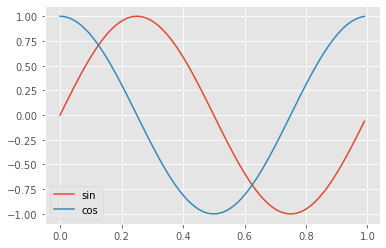

In [2]:
rcParams['figure.figsize'] = 6,4
plt.style.use('ggplot')


X1 = np.linspace(0,1,0.01)
X = np.arange(0,1,0.01)

y_sin = np.sin(2 * np.pi*X)
y_cos = np.cos(2 * np.pi*X)

sns.lineplot(X,y_sin,label="sin");
sns.lineplot(X,y_cos,label="cos");

#file_path = '{}/Desktop/Portfolio_project/presentation/cyclical_time.png'.format(os.environ['HOME'])
#plt.savefig(file_path)

Text(0, 0.5, 'sin(x)')

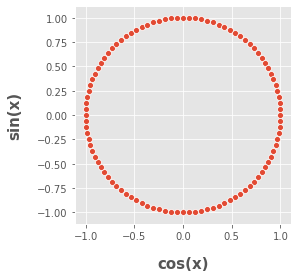

In [3]:
fig = sns.scatterplot(y_sin, y_cos).set_aspect('equal')

plt.xlabel('cos(x)', labelpad=15, fontsize=15, fontweight='bold')
plt.ylabel('sin(x)', labelpad=15, fontsize=15, fontweight='bold')

### __Exercise 1__
Perform a sine / cosine transformation on all time features which are relevant to our training. For that, write a function which takes our dataframe "df" as an input and again returns our processed dataframe as an output.

### __Solution 1__

In [2]:
def time_columns(df):
    
    df.loc[:,'minute'] = df.index.minute
    df['hour'] = df.index.hour
    df['weekday'] = np.where(df.index.weekday < 5, 0, 1)
    df['month'] = df.index.month
    df['year'] = df.index.year

    df['minute_sin'] = np.sin(2 * np.pi * df.loc[:,'minute']/60.0)
    df['minute_cos'] = np.cos(2 * np.pi * df.loc[:,'minute']/60.0)

    df['hour_sin'] = np.sin(2 * np.pi * df.loc[:,'hour']/24.0)
    df['hour_cos'] = np.cos(2 * np.pi * df.loc[:,'hour']/24.0)
    
    df['weekday_sin'] = np.sin(2 * np.pi * df.loc[:,'weekday']/7.0)
    
    df['month_sin'] = np.sin(2 * np.pi * df.loc[:,'month']/12.0)
    df['month_cos'] = np.cos(2 * np.pi * df.loc[:,'month']/12.0)
    
    df.drop(columns=['minute', 'weekday', 'hour', 'month'], inplace=True)
    
    return df

In [3]:
df = pd.read_pickle('../data/train.pkl')
df.head()

,t CO2-e / MWh
2009-07-01 04:00:00,0.991217
2009-07-01 04:05:00,0.000000
2009-07-01 04:10:00,0.000000
2009-07-01 04:15:00,0.991217
2009-07-01 04:20:00,1.025701


In [4]:
df = time_columns(df)

In [5]:
df.head()

,t CO2-e / MWh,year,minute_sin,minute_cos,hour_sin,hour_cos,weekday_sin,month_sin,month_cos
2009-07-01 04:00:00,0.991217,2009,0.000000,1.000000e+00,0.866025,0.5,0.0,-0.5,-0.866025
2009-07-01 04:05:00,0.000000,2009,0.500000,8.660254e-01,0.866025,0.5,0.0,-0.5,-0.866025
2009-07-01 04:10:00,0.000000,2009,0.866025,5.000000e-01,0.866025,0.5,0.0,-0.5,-0.866025
2009-07-01 04:15:00,0.991217,2009,1.000000,2.832769e-16,0.866025,0.5,0.0,-0.5,-0.866025
2009-07-01 04:20:00,1.025701,2009,0.866025,-5.000000e-01,0.866025,0.5,0.0,-0.5,-0.866025


### __Using time lags for target prediction__

In [18]:

#sketch lag / horizon on board
#use presentation slides as well


## __Exercise 2__
Write a function which takes our dataframe as an input together with a specified lag and horizon. The function shall return our processed dataframe as an output.

## __Solution 2__

In [6]:
def lag_horizon(df, lag, horizon):
    '''
    Returns dataset with additional features defined by lag and modified target defined by horizon
    lag=integer of how far back time series should look
    horizon=integer of how far into the future the model shall predict; horizon=0 means prediciton 1 step into future
    '''
    for i in range(1,lag+1):
        df['lag{}'.format(i)] = df['t CO2-e / MWh'].shift(i)
    
    for i in range(1,horizon+2):
        df['horizon{}'.format(i-1)] = df['t CO2-e / MWh'][lag+i:].shift(-i+1)
        
    return df

In [7]:
df = lag_horizon(df, 12, 0)

In [8]:
pd.set_option('display.max_columns', None)
df.head()

,t CO2-e / MWh,year,minute_sin,minute_cos,hour_sin,hour_cos,weekday_sin,month_sin,month_cos,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,lag9,lag10,lag11,lag12,horizon0
2009-07-01 04:00:00,0.991217,2009,0.000000,1.000000e+00,0.866025,0.5,0.0,-0.5,-0.866025,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-07-01 04:05:00,0.000000,2009,0.500000,8.660254e-01,0.866025,0.5,0.0,-0.5,-0.866025,0.991217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-07-01 04:10:00,0.000000,2009,0.866025,5.000000e-01,0.866025,0.5,0.0,-0.5,-0.866025,0.000000,0.991217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-07-01 04:15:00,0.991217,2009,1.000000,2.832769e-16,0.866025,0.5,0.0,-0.5,-0.866025,0.000000,0.000000,0.991217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009-07-01 04:20:00,1.025701,2009,0.866025,-5.000000e-01,0.866025,0.5,0.0,-0.5,-0.866025,0.991217,0.000000,0.000000,0.991217,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
file_path = '../data/train_time_features.pkl'
df.to_pickle(file_path)